In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/DataMining

/content/drive/MyDrive/Colab Notebooks/DataMining


In [3]:
import pandas as pd

# 1. 데이터 전처리

## 종속변수: 1인 가구수

In [4]:
# CSV 파일 불러오기
df_alone = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataMining/livealone_per_dong.csv')

# 데이터 전처리
df_alone.drop([0], axis=0, inplace=True)
df_alone.drop(['동별(1)'], axis=1, inplace=True)
df_alone=df_alone[df_alone['동별(3)'] != '소계']
df_alone.sort_values(['동별(2)','동별(3)'],inplace=True)
df_alone.drop('2015',axis=1,inplace=True)
df_alone.rename(columns={'동별(2)':'구'},inplace=True)
df_alone.rename(columns={'동별(3)':'동'},inplace=True)
df_alone.rename(columns={'2020':'1인가구수'},inplace=True) # 열인덱스 '1인가구수'로 변경
df_alone.reset_index(inplace=True)
df_alone.drop(['index'], axis=1, inplace=True)
df_alone['1인가구수'] = df_alone['1인가구수'].replace('1인가구', 0).astype(float)

# 결과 출력
display(df_alone.head(10))

<ipython-input-4-e675aa258deb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alone.sort_values(['동별(2)','동별(3)'],inplace=True)
<ipython-input-4-e675aa258deb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alone.drop('2015',axis=1,inplace=True)
<ipython-input-4-e675aa258deb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alone.rename(columns={'동별(2)':'구'},inplace=True)
<ipython-input-4-e675aa258deb>:11: SettingWithCopyW

,구,동,1인가구수
0,강남구,개포1동,550.0
1,강남구,개포2동,1058.0
2,강남구,개포4동,2280.0
3,강남구,논현1동,7121.0
4,강남구,논현2동,4618.0
5,강남구,대치1동,350.0
6,강남구,대치2동,1807.0
7,강남구,대치4동,4269.0
8,강남구,도곡1동,1872.0
9,강남구,도곡2동,1408.0


## 설명변수(1): 학원 교습소

In [5]:
# CSV 파일 불러오기
df_academy = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataMining/서울시 학원 교습소정보.csv', encoding='cp949')

# 데이터 전처리
df_academy = df_academy[['행정구역명', '학원명', '도로명상세주소']]
df_academy = df_academy[df_academy['도로명상세주소'].str.contains("동",  na=False)]
df_academy = df_academy[df_academy['행정구역명'].str.contains("구",  na=False)]
df_academy.rename(columns={'행정구역명':'구'},inplace=True)
df_academy.rename(columns={'도로명상세주소':'동'},inplace=True)
df_academy.sort_values(['구','동'],inplace=True)
df_academy = df_academy.loc[df_academy['구'].notnull()]
df_academy = df_academy.loc[df_academy['동'].notnull()]
df_academy.reset_index(inplace=True)
df_academy = df_academy[['구', '동']]
df_academy['3'] = df_academy['동'].str.extract(r'\(([^)]+)\)$')
df_academy['2']=df_academy['3'].str[:2]
df_academy["3"]=df_academy["동"].str.split(")",expand = True)[0]
df_academy.drop('3',axis=1,inplace=True)
df_academy.drop('동',axis=1,inplace=True)
df_academy.rename(columns={'2':'동'},inplace=True)
df_aca=df_academy.groupby(['구','동']).size()
df_aca = df_aca.reset_index()
df_aca.rename(columns={0:'학원교습소'},inplace=True) # 열인덱스 '학원교습소'로 변경

# 결과 출력
display(df_aca.head(10))

,구,동,학원교습소
0,강남구,개포,210
1,강남구,내곡,1
2,강남구,논현,183
3,강남구,대치,1653
4,강남구,도곡,164
5,강남구,반포,9
6,강남구,방배,1
7,강남구,삼성,140
8,강남구,서초,23
9,강남구,세곡,38


##설명변수(2): 일반대학 및 전문대학 ``-> 선형회귀에서는 사용X``

In [6]:
# CSV 파일 불러오기
df_university = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataMining/서울시 대학 및 전문대학 DB 정보 (한국어).csv', encoding='cp949')

# 데이터 전처리
df_university = df_university[['학교상태','행정구', '행정동']]
df_university = df_university[df_university['학교상태']=='기존']
df_university.drop('학교상태',axis=1,inplace=True)
df_university['동']=df_university['행정동'].str[:2]
df_university.drop('행정동',axis=1,inplace=True)
df_uni=df_university.groupby(['행정구','동']).size()
df_uni = df_uni.reset_index()
df_uni.rename(columns={'행정구':'구'},inplace=True)
df_uni.rename(columns={0:'대학교'},inplace=True)

# 결과 출력
display(df_uni.head(10))

,구,동,대학교
0,강남구,논현,1
1,강북구,미아,1
2,강서구,우장,1
3,강서구,화곡,1
4,관악구,낙성,1
5,광진구,광장,1
6,광진구,군자,1
7,광진구,화양,1
8,구로구,개봉,1
9,구로구,고척,1


## 설명변수(3): 편의점

In [7]:
# CSV 파일 불러오기
df_convenience = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataMining/서울시 안전상비의약품 판매업소 인허가 정보.csv', encoding='cp949')

# 데이터 전처리
df_convenience = df_convenience[['도로명주소', '사업장명']]
df_convenience = df_convenience.loc[df_convenience['도로명주소'].notnull()]
df_convenience.loc[:, "구"] = df_convenience['도로명주소'].str.split(" ", expand=True)[1]
df_convenience.loc[:, '동'] = df_convenience['도로명주소'].str.extract(r'\(([^)]+)\)$')
df_convenience.drop(['도로명주소', '사업장명'], axis=1, inplace=True)
df_convenience.loc[:, '동'] = df_convenience['동'].str[:2]
df_convenience = df_convenience.loc[df_convenience['동'].notnull()]
df_con = df_convenience.groupby(['구', '동']).size()
df_con = df_con.reset_index()
df_con.rename(columns={0: '편의점'}, inplace=True)

# 결과 출력
display(df_con.head(10))

,구,동,편의점
0,강남구,개포,66
1,강남구,논현,257
2,강남구,대치,201
3,강남구,도곡,86
4,강남구,삼성,174
5,강남구,세곡,14
6,강남구,수서,20
7,강남구,신사,170
8,강남구,압구,15
9,강남구,역삼,402


## 설명변수(4): 일인당 도시가스 이용량
* 도시가스 사용량은 수거함 설치 장소가 될 수 없지만, 1인가구가 다인가구에 비해 얼마나 집에서 직접 취사를 하는지 파악하고자 설명변수로 사용함.

### (1) 동별 도시가스 사용량 계산

In [8]:
# CSV 파일 불러오기
df_seoulgas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataMining/도시가스+이용현황(용도별_동별)_20230522161500.csv')

# 데이터 전처리
df_seoulgas=df_seoulgas[['동별(2)','동별(3)','2021.2']]
df_seoulgas.replace('-',0,inplace=True)
df_seoulgas=df_seoulgas[df_seoulgas['동별(3)'] != '소계']
df_seoulgas.drop([0,1,2], axis=0, inplace=True)
df_seoulgas.rename(columns={'동별(2)':'구'},inplace=True)
df_seoulgas.rename(columns={'동별(3)':'동'},inplace=True)
df_seoulgas.rename(columns={'2021.2':'도시가스'},inplace=True) #2021 열인덱스를 '도시가스'로 변경!
df_seoulgas['동']=df_seoulgas['동'].str[:2]
df_seoulgas['도시가스'] = df_seoulgas['도시가스'].astype(int)
df_seoulgas = df_seoulgas.groupby(['구', '동'])['도시가스'].sum().reset_index()

# 결과 출력
display(df_seoulgas.head(10))

,구,동,도시가스
0,강남구,개포,9790
1,강남구,논현,1067
2,강남구,대치,13881
3,강남구,도곡,12823
4,강남구,삼성,5432
5,강남구,세곡,5609
6,강남구,수서,7246
7,강남구,신사,2445
8,강남구,압구,5897
9,강남구,역삼,6820


### (2) 동별 인구수 계산
* **일인당** 취사용 도시가스 사용량을 파악하기 위함

In [9]:
import pandas as pd

# CSV 파일 불러오기
df_people = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataMining/people.csv')

# 데이터 전처리
df_people.drop([0], axis=0, inplace=True)
df_people.drop(['동별(1)'], axis=1, inplace=True)
df_people = df_people[df_people['동별(3)'] != '소계']
df_people.sort_values(['동별(2)', '동별(3)'], inplace=True)
df_people.rename(columns={'동별(2)': '구', '동별(3)': '동', '2020': '인구수'}, inplace=True)
df_people['동'] = df_people['동'].str[:2]
df_people.reset_index(drop=True, inplace=True)
df_people['인구수'] = df_people['인구수'].replace('인구수', 0).astype(int)

# '구'와 '동' 별로 그룹화하여 인구수 합계 계산
df_peo = df_people.groupby(['구', '동'])['인구수'].sum().reset_index()

# 결과 출력
from IPython.display import display
display(df_peo.head(10))

,구,동,인구수
0,강남구,개포,51732
1,강남구,논현,45731
2,강남구,대치,83418
3,강남구,도곡,56269
4,강남구,삼성,43968
5,강남구,세곡,44475
6,강남구,수서,15299
7,강남구,신사,16914
8,강남구,압구,27440
9,강남구,역삼,74062


### (3) 일인당 취사용 도시가스 사용량
* (동별 도시가스 사용량) / (동별 인구수) 계산을 통해 일인당 도시가스 사용량 산출

In [10]:
# '구'와 '동'이 동일한 행들을 기준으로 데이터프레임 병합
df_gas = pd.merge(df_seoulgas, df_peo, on=['구', '동'])

# '도시가스' 값을 '인구수'로 나누기
df_gas['취사용가스'] = df_gas['도시가스'] / df_gas['인구수']
df_gas.drop(['도시가스', '인구수'], axis=1, inplace=True)

# 결과 출력
display(df_gas.head(10))

,구,동,취사용가스
0,강남구,개포,0.189245
1,강남구,논현,0.023332
2,강남구,대치,0.166403
3,강남구,도곡,0.227887
4,강남구,삼성,0.123544
5,강남구,세곡,0.126116
6,강남구,수서,0.473626
7,강남구,신사,0.144555
8,강남구,압구,0.214905
9,강남구,역삼,0.092085


## 설명변수(5): 병원

In [11]:
# CSV 파일 불러오기
df_hospital = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataMining/seoul_hospital.csv')

# 데이터 전처리
df_hospital = df_hospital[['동별(2)', '동별(3)', '2017']]
df_hospital = df_hospital[df_hospital['동별(3)'] != '소계']
df_hospital.rename(columns={'동별(2)': '구', '동별(3)': '동'}, inplace=True)
df_hospital.drop([0], axis=0, inplace=True)
df_hospital['동'] = df_hospital['동'].str[:2]
df_hospital['2017'] = df_hospital['2017'].astype(int)
df_hos = df_hospital.groupby(['구', '동'])['2017'].sum().reset_index()
df_hos.rename(columns={'2017': '병원'}, inplace=True)

# 결과 출력
display(df_hos.head(10))

,구,동,병원
0,강남구,개포,67
1,강남구,논현,399
2,강남구,대치,286
3,강남구,도곡,131
4,강남구,삼성,165
5,강남구,세곡,29
6,강남구,수서,33
7,강남구,신사,640
8,강남구,압구,14
9,강남구,역삼,495


## 총 설명변수 정리

In [12]:
# 여러 데이터프레임 병합
merged_df = pd.merge(df_alone, df_aca, on=['구', '동'], how='outer')
merged_df = pd.merge(merged_df, df_uni, on=['구', '동'], how='outer')
merged_df = pd.merge(merged_df, df_con, on=['구', '동'], how='outer')
merged_df = pd.merge(merged_df, df_gas, on=['구', '동'], how='outer')
merged_df = pd.merge(merged_df, df_hos, on=['구', '동'], how='outer')

# '동' 값이 세 글자 이상이고 '동'으로 끝나는 경우, 맨 끝글자 '동'을 삭제
merged_df.loc[merged_df['동'].str.len() >= 3, '동'] = merged_df.loc[merged_df['동'].str.len() >= 3, '동'].str[:-1]

# '동' 값이 숫자로 끝나는 경우, 맨 끝에 있는 숫자를 삭제
merged_df['동'] = merged_df['동'].str.replace(r'\d$', '', regex=True)

# 특정 '동' 값 수정
fix_dong_names = {'번': '번동', '묵': '묵동', '창': '창동', '목': '목동'}
for short_name, full_name in fix_dong_names.items():
    merged_df.loc[merged_df['동'] == short_name, '동'] = full_name
merged_df.loc[merged_df['동'].str.contains('면목'), '동'] = '면목'

# 행 합산
merged_df = merged_df.groupby(['구', '동']).sum().reset_index()

# 1인가구수 혹은 도시가스 값이 0인 경우 결측치로 간주하여 제거
merged_df = merged_df[merged_df['1인가구수'] != 0]

# 랜덤으로 20개의 행 출력
random_sample = merged_df.sample(n=10, random_state=42)

# 결과 출력
display(random_sample)

,구,동,1인가구수,학원교습소,대학교,편의점,취사용가스,병원
258,송파구,가락,3527.0,230.0,0.0,106.0,0.149014,129.0
10,강남구,수서,3083.0,27.0,0.0,20.0,0.473626,33.0
160,마포구,망원,6227.0,77.0,0.0,69.0,0.000942,65.0
265,송파구,석촌,6716.0,117.0,0.0,79.0,0.000060,66.0
165,마포구,성산,10200.0,96.0,0.0,81.0,0.116392,45.0
277,양천구,신정,14359.0,884.0,0.0,173.0,0.199755,243.0
308,용산구,이촌,2015.0,46.0,0.0,22.0,0.295030,49.0
423,중구,소공,435.0,1.0,0.0,4.0,0.000332,65.0
15,강남구,역삼,17470.0,379.0,0.0,402.0,0.092085,495.0
41,강북구,인수,3937.0,0.0,0.0,0.0,0.000254,18.0


# 2. 다중선형회귀

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [14]:
x = merged_df[['학원교습소', '대학교', '편의점', '취사용가스', '병원']]
y = merged_df['1인가구수']

# 각 변수에 대한 단순 선형회귀 모델 생성 및 시각화
def simple_linear_regression_and_plot(x_var, x_label):
    # 단순 선형 회귀 모델 생성
    simple_model = LinearRegression()
    simple_model.fit(x_var, y)

    coefficients = simple_model.coef_
    intercept = simple_model.intercept_
    print(f'{x_label} 회귀 계수:', coefficients)
    print(f'{x_label} 절편:', intercept)

    # 시각화
    plt.figure(figsize=(5, 3))
    plt.scatter(x_var, y, color='blue', label='Data')
    plt.plot(x_var, simple_model.predict(x_var), color='red', linewidth=2, label='Linear Regression')
    plt.xlabel(x_label)
    plt.ylabel('Single')
    plt.title('Linear Regression')
    plt.legend()
    plt.grid(True)
    plt.show()

Academy 회귀 계수: [9.64408556]
Academy 절편: 4702.581426853909


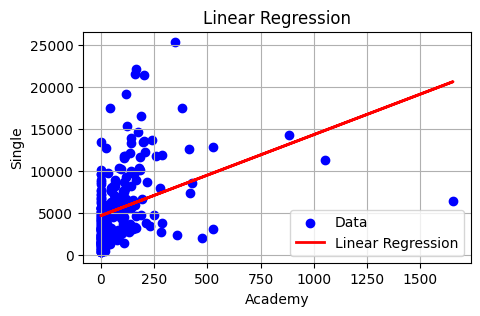

Convenience Store 회귀 계수: [45.36433238]
Convenience Store 절편: 3188.5122286892033


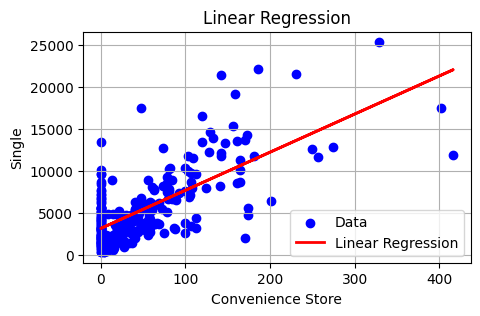

Gas 회귀 계수: [3811.62116586]
Gas 절편: 5332.447894839458


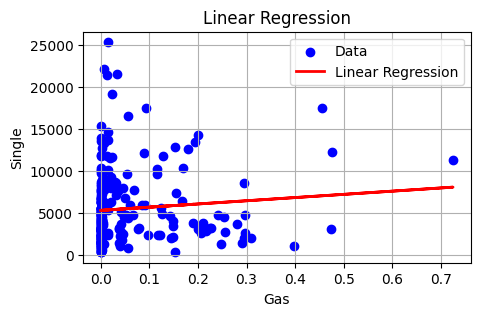

Hospital 회귀 계수: [26.45483673]
Hospital 절편: 3865.332446033027


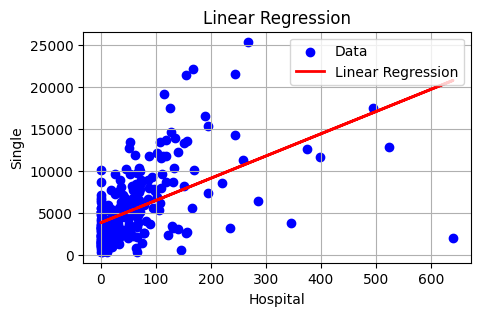

In [15]:
# 학원교습소에 대한 단순 선형회귀 및 시각화
simple_linear_regression_and_plot(x[['학원교습소']], 'Academy')

# 대학교에 대한 단순 선형회귀 및 시각화
# simple_linear_regression_and_plot(x[['대학교']], 'University')

# 편의점에 대한 단순 선형회귀 및 시각화
simple_linear_regression_and_plot(x[['편의점']], 'Convenience Store')

# 취사용가스에 대한 단순 선형회귀 및 시각화
simple_linear_regression_and_plot(x[['취사용가스']], 'Gas')

# 병원에 대한 단순 선형회귀 및 시각화
simple_linear_regression_and_plot(x[['병원']], 'Hospital')

* 대학교는 한 동에 0~2개의 값을 가지기 때문에 **충분한 선형관계가 나타나지 않음**. 따라서 선형회귀에서 제외하는 것이 낫다고 판단됨.

## 2.1 다중공선성 판단
* 독립변수별 스케일이 다르므로 표준화 진행

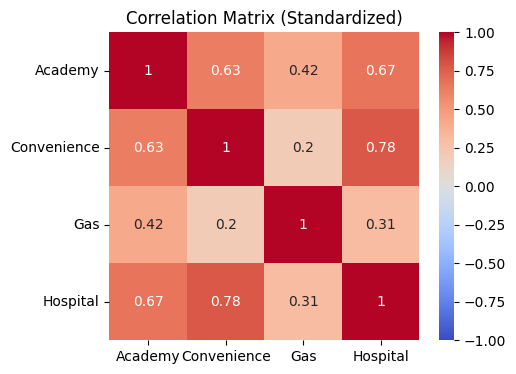

       feature       VIF
0      Academy  2.132578
1  Convenience  2.769113
2          Gas  1.241113
3     Hospital  2.993329
                            OLS Regression Results                            
Dep. Variable:                  1인가구수   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     62.87
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           1.38e-36
Time:                        08:44:09   Log-Likelihood:                -2378.7
No. Observations:                 252   AIC:                             4767.
Df Residuals:                     247   BIC:                             4785.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# 데이터 준비
x = merged_df[['학원교습소', '편의점', '취사용가스', '병원']]
y = merged_df['1인가구수']

# 컬럼명을 영어로 변경
x.columns = ['Academy', 'Convenience', 'Gas', 'Hospital']

# 표준화
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# 상관행렬 계산 및 시각화 (표준화된 데이터 사용)
corr_matrix = pd.DataFrame(x_scaled, columns=x.columns).corr()
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Standardized)')
plt.show()

# VIF 계산 (표준화된 데이터 사용)
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x_scaled, i) for i in range(x.shape[1])]

print(vif_data)

# OLS 회귀 모델 적합 (표준화된 데이터 사용)
x_scaled = sm.add_constant(x_scaled)
model = sm.OLS(y, x_scaled).fit()

# 회귀 분석 결과 요약
print(model.summary())

* **다중공선성**이란 다중회귀모형에서 두개 이상의 입력변수가 높은 상관관계를 갖는 현상을 말한다. 이런 경우 다중회귀분석의 계수는 작은 변화에도 불규칙하게 변경될 수 있다. 따라서 다중공선성이 나타나는 변수가 없는지 확인하고자 VIF를 구해보았다.
* 그 결과 '학원 교습소', '대학교', '편의점', '도시가스', '병원'이라는 모든 설명변수의 VIF가 10을 넘지 않는다.
 그러나 Correlation Matrix에 따르면 특정 변수 쌍 간에 강한 상관관계가 존재한다.

# 4. K-Means Cluster
* 비지도 학습으로, 종속변수가 없을 때 유용
* 선형 회귀는 변수 간의 선형 관계를 가정함. 그러나 현재 사용되는 변수들 중 일부는 선형 관계가 뚜렷하지 않음. → 비선형 관계를 탐색할 수 있는 알고리즘 필요
* 데이터의 군집화를 통해 패턴을 발견하고자 함.
* 다중공선성 문제 사전 방지

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
# '구'와 '동' 열 합치기
data_encoded = pd.get_dummies(merged_df, columns=['구', '동'])
num_clusters = 5


# K-Means 알고리즘을 사용한 클러스터링
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data_encoded)

# 각 데이터 포인트의 클러스터 할당 결과
labels = kmeans.labels_

# 클러스터링 결과 출력
for i in range(num_clusters):
    cluster_data = merged_df[labels == i]
    print(f"Cluster {i+1}: {len(cluster_data)} data points")
    print(cluster_data)
    print("\n")

Cluster 1: 22 data points
        구   동    1인가구수   학원교습소  대학교    편의점     취사용가스     병원
2     강남구  논현  11739.0   183.0  1.0  257.0  0.023332  399.0
30    강동구  천호  15332.0   122.0  0.0  156.0  0.000566  194.0
39    강북구  수유  11773.0   112.0  0.0  181.0  0.000000  119.0
46    강서구  등촌  13503.0   198.0  0.0  119.0  0.194123  107.0
49    강서구  방화  11812.0   108.0  0.0  103.0  0.128974   88.0
70    관악구  신림  11942.0   288.0  0.0  416.0  0.001500   63.0
77    관악구  청룡  13435.0     1.0  0.0    0.0  0.004625   53.0
81    광진구  구의  11750.0   258.0  0.0  142.0  0.012805  113.0
84    광진구  자양  13596.0   202.0  0.0  161.0  0.000399  156.0
85    광진구  중곡  13953.0   143.0  0.0  133.0  0.000411  135.0
86    광진구  화양  12704.0    25.0  1.0   74.0  0.002193   52.0
102   금천구  시흥  13346.0   140.0  0.0  147.0  0.007279  151.0
107   노원구  공릉  12139.0   136.0  2.0  142.0  0.089319  103.0
109   노원구  상계  12618.0   413.0  1.0  250.0  0.178731  374.0
125   도봉구  창동  12312.0   207.0  0.0  128.0  0.474952  141.0
147   동작구  사당 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


* Cluster 5: 대표적인 20대 1인가구 거주지 청룡,화양, 역삼, 신림 얘네가 있는 클러스터를 찾되,  이 말은 하지말고 데이터를 보고 햇반 주사용자로 추정되는 클러스터를 선정해보았다고 하기.
* 이 변수들은 햇반사용자수와 관계가 있을 거라고 예상한 변수들을 선정해 모은 것이다.
* 예를들어 햇반을 많이 쓰는 사람은 도시가스를 많이 안쓸 것이다. 역상관계수 병원
*"이 클러스터를 보시면 이 클러스터는 1인가구수, 편의점 수가 높은 반면 학원교습소 수는 낮아, 햇반 주사용자가 많은 동네라고 추정" 뭐 이런식으로 소개
* **도시가스는 1인당 평균사용량으로 바꾸기! **

## Cluster별 평균, 표준편차, 중앙값

In [ ]:
for i in range(num_clusters):
    cluster_data = merged_df[labels == i]

    cluster_mean = cluster_data.mean() # 특성별 평균 계산
    cluster_std = cluster_data.std()  # 특성별 표준편차 계산
    cluster_median = cluster_data.median()  # 특성별 중앙값 계산

    print(f"Cluster {i+1} Statistics:")
    print("Mean:")
    print(cluster_mean)
    print("Standard Deviation:")
    print(cluster_std)
    print("Median:")
    print(cluster_median)
    print("\n")

Cluster 1 Statistics:
Mean:
1인가구수     13047.636364
학원교습소       259.454545
대학교           0.318182
편의점         161.318182
취사용가스         0.104610
병원          173.500000
labels        1.000000
dtype: float64
Standard Deviation:
1인가구수     1356.104419
학원교습소      257.356475
대학교          0.567900
편의점         82.350231
취사용가스        0.179004
병원         120.212411
labels       0.000000
dtype: float64
Median:
1인가구수     12762.500000
학원교습소       186.000000
대학교           0.000000
편의점         144.500000
취사용가스         0.016542
병원          131.000000
labels        1.000000
dtype: float64


Cluster 2 Statistics:
Mean:
1인가구수     4943.653846
학원교습소       75.897436
대학교          0.269231
편의점         38.602564
취사용가스        0.038257
병원          46.512821
labels       2.000000
dtype: float64
Standard Deviation:
1인가구수     886.086065
학원교습소     193.120485
대학교         0.550633
편의점        41.451063
취사용가스       0.073500
병원         54.813910
labels      0.000000
dtype: float64
Median:
1인가구수     4849.00000
학원교습소       2

<ipython-input-349-1b5c5ad95de0>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cluster_mean = cluster_data.mean() # 특성별 평균 계산
<ipython-input-349-1b5c5ad95de0>:5: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cluster_std = cluster_data.std()  # 특성별 표준편차 계산
<ipython-input-349-1b5c5ad95de0>:6: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of nu

* 분석 결과:
* 클러스터 1와 클러스터 5가 1인가구수 및 편의점 수가 많으나,  대학교와 병원 수는 클러스터 1가 클러스터 5보다 적게 나타남
* 이 결과는 1인가구수가 많은 클러스터 1와 클러스터 5 중, 클러스터 2에 햇반 주이용자 비율이 높다는 가능성을 시사함.
* (조사하면서 알게된 청년 1인가구 많이 사는 신림동, 화양동, 청룡동 등도 이 클러스터에 속함)
* 따라서 이 클러스터1의 지역이 햇반 주이용자 거주 지역이라는 결론을 내렸다.
* 이중 1인가구가 가장 많은 동 5개를 꼽아 설치가 시급한 지역을 선정하고자 한다.

In [ ]:
# 클러스터 1
cluster_df = merged_df
cluster_df['labels']=labels+1
cluster_df[cluster_df['labels'] == 1].sort_values(['1인가구수'], ascending=False, inplace=False).head(10)

,구,동,1인가구수,학원교습소,대학교,편의점,취사용가스,병원,labels
147,동작구,사당,16611.0,189.0,1.0,120.0,0.056332,189.0,1
30,강동구,천호,15332.0,122.0,0.0,156.0,0.000566,194.0,1
283,영등포구,신길,14640.0,174.0,0.0,129.0,0.014919,127.0,1
277,양천구,신정,14359.0,884.0,0.0,173.0,0.199755,243.0,1
85,광진구,중곡,13953.0,143.0,0.0,133.0,0.000411,135.0,1
276,양천구,신월,13708.0,240.0,0.0,170.0,0.015096,119.0,1
84,광진구,자양,13596.0,202.0,0.0,161.0,0.000399,156.0,1
46,강서구,등촌,13503.0,198.0,0.0,119.0,0.194123,107.0,1
77,관악구,청룡,13435.0,1.0,0.0,0.0,0.004625,53.0,1
102,금천구,시흥,13346.0,140.0,0.0,147.0,0.007279,151.0,1


## Cluster 시각화

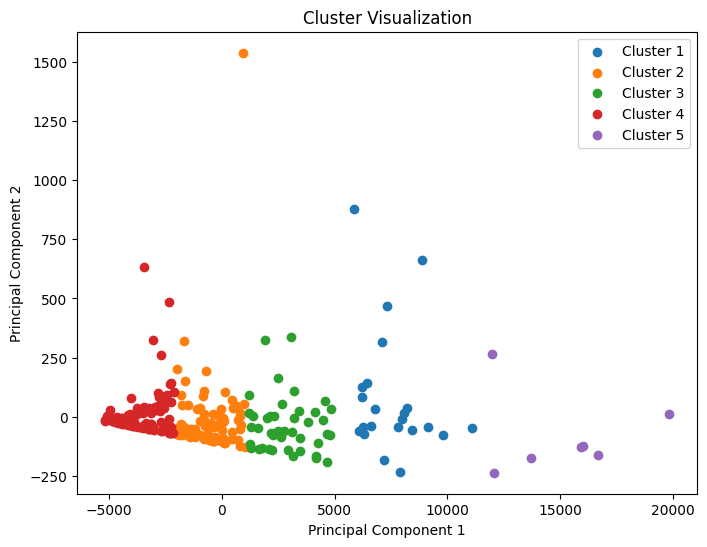

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 클러스터링 결과가 다차원이므로, 주성분 분석을 통한 차원 축소
pca = PCA(n_components=2)
data_encoded_2d = pca.fit_transform(data_encoded)

# 클러스터링 결과 시각화
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    cluster_data = data_encoded_2d[labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {i+1}")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Cluster Visualization")
plt.legend()
plt.show()
